In [1]:
""" Helper imports"""
import re
import html.parser
import pandas as pd
import unicodedata
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
import string
from datetime import date, timedelta
from collections import Counter
from operator import itemgetter

"""Modeling imports"""
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf

""" Plotting imports"""
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


""" Google imports"""
from google.cloud import bigquery

# remove this later
pd.set_option('max_colwidth', 110)
import warnings
warnings.filterwarnings('ignore')

**---Exploration---**

In [4]:
df = pd.read_csv(data_path + 'raw/articles.csv')

In [5]:
df.tail(2)

,categoryName,tier1,tier2,content_natid,pub_date,title,body,clean_body
990,Retirement Planning,Personal Finance,Retirement Planning,blogandpostid/blog/post/1058-60256ddc3c0f2000064d24a3,2021-02-11,Ask Larry: Is A Break Even Analysis A Good Way To Decide When To Take My Social Security Benefits?,[id=0]<p>Today's column addresses questions about whether to decide when to file according to a break even...,ask larry: is a break even analysis a good way to decide when to take my social security benefits?. today'...
991,Law,News and Politics,Law,blogandpostid/blog/post/50531-6024ddf688d2130006c2cfa0,2021-02-11,"Biden Brings Up China’s Human Rights Abuses, ‘Unfair’ Economic Practices In First Call With Xi Jinping","<h2 class=""topline-heading"">Topline</h2><p>President Joe Biden confronted Chinese President Xi Jinping abo...","biden brings up chinas human rights abuses, unfair economic practices in first call with xi jinping. topli..."


In [6]:
print(len(df.tier1.unique()))
df.tier1.value_counts()

29


Business and Finance        245
Personal Finance            120
Sports                       89
Technology & Computing       73
Medical Health               71
News and Politics            64
Video Gaming                 34
Automotive                   30
Food & Drink                 23
Travel                       23
Style & Fashion              22
Real Estate                  22
Events and Attractions       22
Careers                      21
Education                    19
Music and Audio              18
Shopping                     18
Movies                       17
Science                      17
Television                   13
Home & Garden                 7
Family and Relationships      6
Healthy Living                5
Hobbies & Interests           4
Pop Culture                   3
Books and Literature          2
Fine Art                      2
Pets                          1
Religion & Spirituality       1
Name: tier1, dtype: int64

<AxesSubplot:xlabel='unigram'>

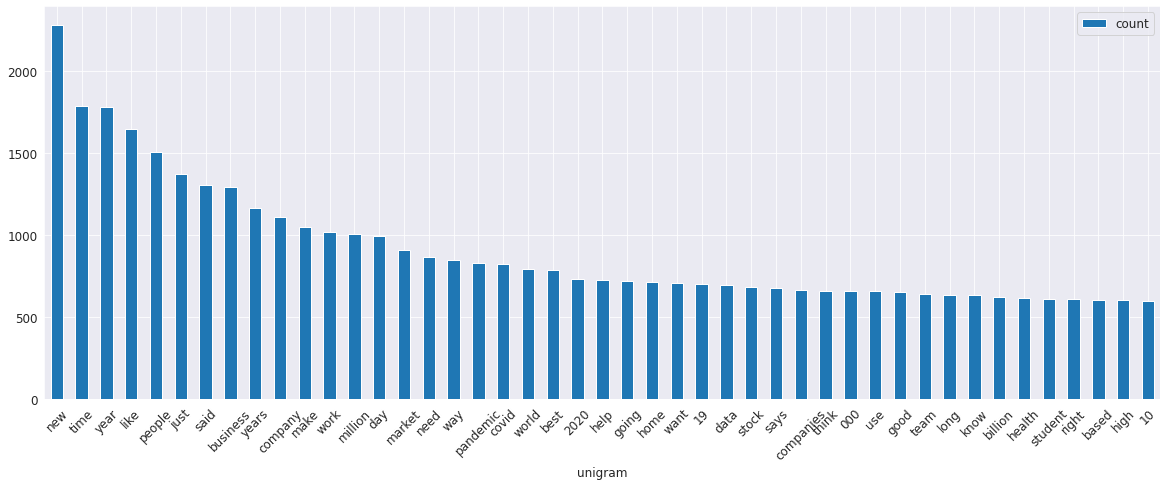

In [13]:
# UNIGRAM

<AxesSubplot:xlabel='bigram'>

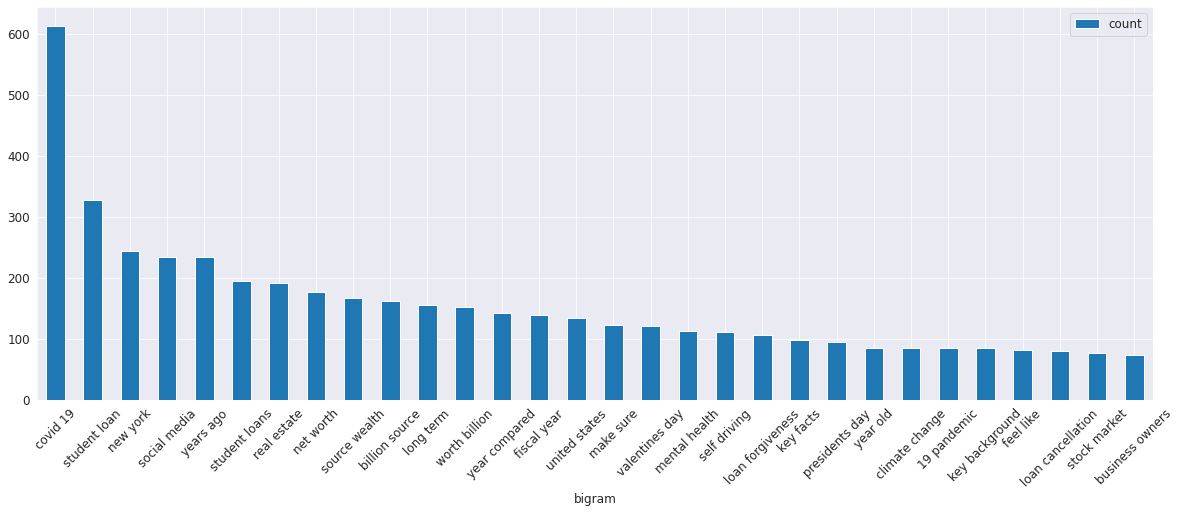

In [14]:
# BIGRAM

<AxesSubplot:xlabel='trigram'>

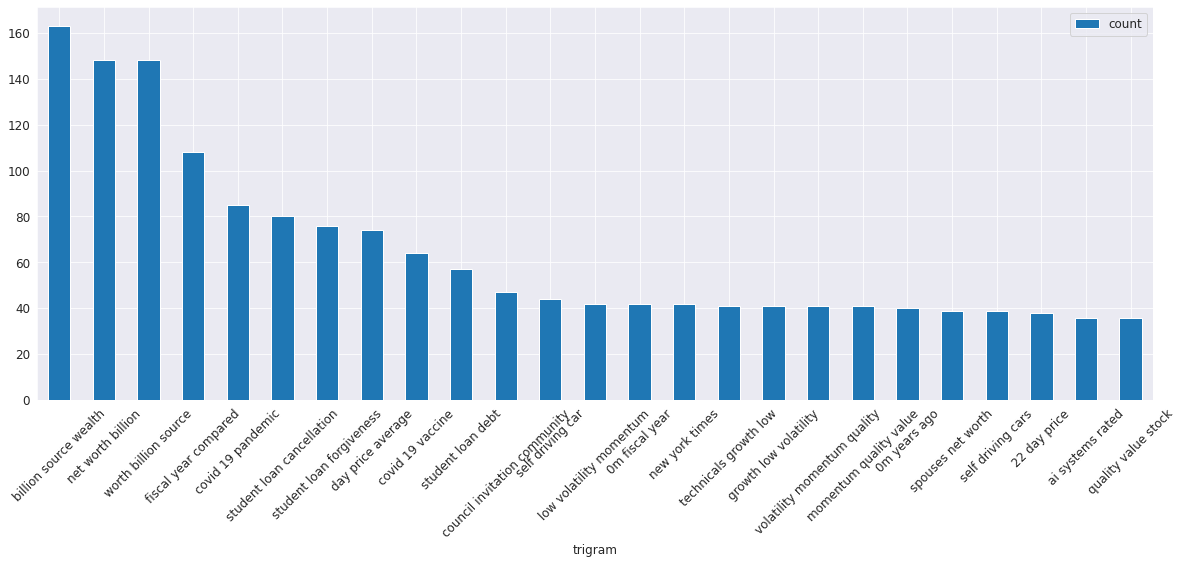

In [15]:
# TRIGRAM

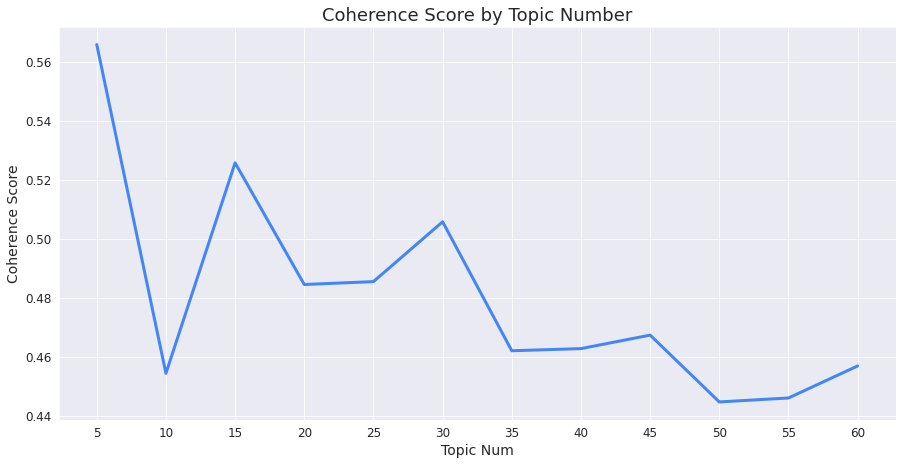

In [17]:
# COHERENCE SCORE

**Observations:** <br>
* Chose topics = 30 (IAB categories in current dataset = 29)

,categoryName,tier1,tier2,content_natid,pub_date,title,body,clean_body,processed_noun,topic_num,Top_Topic_Terms
0,Computer Software and Applications,Technology & Computing,Computing,blogandpostid/blog/post/6803-6023eb1ad61df20006dff468,2021-12-31,76% Of Smartphone Owners Use Mobile Apps To Manage Their Finances,"[id=23]<h2 class=""subhead-embed color-accent bg-base font-accent font-size text-align"">OBSERVATIONS FROM T...",76% of smartphone owners use mobile apps to manage their finances. observations from the fintech snark tan...,"[%, smartphone, owners, apps, finances, observations, fintech, snark, study, cornerstone, advisors, %, sma...",8,bitcoin cryptocurrency
1,Green Vehicles,Automotive,Auto Type,blogandpostid/blog/post/1468-602c35b19335830006abbd9c,2021-02-17,Buy Churchill Capital IV (CCIV) On $12B Lucid Motors Merge Report,"[id=0]<p>A former Tesla<fbs-ticker data-name=""TSLA"" data-href=""https://www.forbes.com/companies/tesla""><a ...",buy churchill capital iv (cciv) on $12b lucid motors merge report. a former tesla tsla executive cofounded...,"[capital, iv, cciv, lucid, motors, report, tesla, tsla, executive, motors, years, reuters, lucid, cciv, ac...",16,car vehicles
2,Consumer Electronics,Technology & Computing,Consumer Electronics,blogandpostid/blog/post/2978-602cdf4a937e4500069dc063,2021-02-17,Iconic British Audio Brand Unveils Its First Pair Of Active Noise-Canceling Earphones,"[id=0]<p>Recently, KEF, the iconic British speaker manufacturer, released its first-ever pair of ANC (acti...","iconic british audio brand unveils its first pair of active noise-canceling earphones. recently, kef, the ...","[audio, brand, pair, earphones, kef, speaker, manufacturer, pair, anc, noise-canceling, earphones, mu3, ea...",26,music songs
3,Real Estate Buying and Selling,Real Estate,Real Estate Buying and Selling,blogandpostid/blog/post/4972-602bd2797529240006822ee2,2021-02-17,"When Hiring For Your Real Estate Business, Focus On 'Who' Rather Than 'What'","<p><em>Mike McMullen is the CEO of&nbsp;</em><a href=""https://myprominencehome.com/"" target=""_blank"" class...","when hiring for your real estate business, focus on 'who' rather than 'what'. mike mcmullen is the ceo of ...","[estate, business, focus, 'who, mcmullen, ceo, prominence, homes, author, build, rent, repeat, business, o...",11,employees work
4,Marketing and Advertising,Business and Finance,Business,blogandpostid/blog/post/4254-602c1ff927035b000647a50b,2021-02-17,"The Good, The Bad And The Value Of Affiliate Marketing","<p><em>VP of Marketing at&nbsp;</em><a href=""http://www.clickbank.com/"" target=""_blank"" class=""color-link""...","the good, the bad and the value of affiliate marketing. vp of marketing at clickbank , overseeing all mark...","[value, affiliate, marketing, vp, marketing, clickbank, marketing, education, world, advertising, characte...",9,media marketing


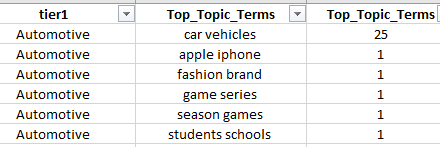

In [25]:
# correct topic
df_topics[(df_topics.tier1 == "Automotive") & (df_topics.Top_Topic_Terms == "apple iphone ")]

,categoryName,tier1,tier2,content_natid,pub_date,title,body,clean_body,processed_noun,topic_num,Top_Topic_Terms
402,Green Vehicles,Automotive,Auto Type,blogandpostid/blog/post/6919-602b72c7937e450006ea91e5,2021-02-16,What Sort Of Car Would Apple Make?,"[id=0]<p>For several years, the tech world has swirled with rumors of an Apple<fbs-ticker data-name=""AAPL""...","what sort of car would apple make?. for several years, the tech world has swirled with rumors of an apple ...","[sort, car, apple, years, tech, world, rumors, apple, aapl, car, apple, car, amount, apples, self-driving,...",18,apple iphone


In [27]:
# wrong topic because of the word "brand"
df_topics[(df_topics.tier1 == "Automotive") & (df_topics.Top_Topic_Terms == "fashion brand ")]

,categoryName,tier1,tier2,content_natid,pub_date,title,body,clean_body,processed_noun,topic_num,Top_Topic_Terms
428,SUV,Automotive,Auto Body Styles,blogandpostid/blog/post/4988-602a47a742bf110006d30fbd,2021-02-15,"Jaguar To Turn All Electric By 2025, Land Rover EVs Start In 2024","[id=0]<p>Jaguar will pivot away from its heritage to become a full electric car brand within five years, w...","jaguar to turn all electric by 2025, land rover evs start in 2024. jaguar will pivot away from its heritag...","[jaguar, start, jaguar, heritage, car, brand, years, land, rover, stablemate, company, morning, land, rove...",28,fashion brand


In [28]:
# correct topic
df_topics[(df_topics.tier1 == "Automotive") & (df_topics.Top_Topic_Terms == "game series ")]

,categoryName,tier1,tier2,content_natid,pub_date,title,body,clean_body,processed_noun,topic_num,Top_Topic_Terms
34,Automotive,Automotive,NaN,blogandpostid/blog/post/4463-6024366088d213000675dfe0,2021-02-17,Do You Even Zwift? The Indoor Cycling Platform Is Having A Moment,[id=0]<p>The Holy Grail of brand building is achieved when your startup crosses the language chasm from no...,do you even zwift? the indoor cycling platform is having a moment. the holy grail of brand building is ach...,"[indoor, cycling, platform, moment, grail, brand, building, startup, language, chasm, noun, share, cash, f...",25,game series


In [30]:
# somewhat correct topic - article related to sports
df_topics[(df_topics.tier1 == "Automotive") & (df_topics.Top_Topic_Terms == "season games ")]

,categoryName,tier1,tier2,content_natid,pub_date,title,body,clean_body,processed_noun,topic_num,Top_Topic_Terms
971,Luxury Cars,Automotive,Auto Type,blogandpostid/blog/post/1194-602524a59abeef0006b47705,2021-02-11,Mercedes-Benz EQ Formula E Team Unveils Its Secret To Racing Success,"<p><em>By Sydney Wilson, SAP Customer Marketing</em></p><p>Every second counts in the business world.</p>[...","mercedes-benz eq formula e team unveils its secret to racing success. by sydney wilson, sap customer marke...","[eq, formula, e, team, success, sydney, wilson, customer, marketing, counts, business, world, fractions, m...",4,season games


In [33]:
# somewhat correct topic - article related to working parents
df_topics[(df_topics.tier1 == "Automotive") & (df_topics.Top_Topic_Terms == "students schools ")]

,categoryName,tier1,tier2,content_natid,pub_date,title,body,clean_body,processed_noun,topic_num,Top_Topic_Terms
788,Green Vehicles,Automotive,Auto Type,blogandpostid/blog/post/4372-6026f26e02dcba0006e5e8f2,2021-02-12,Here’s What Working Parents Should Envy About Norway (and It’s Not Just The Electric Cars),<p>Norway’s gotten a lot of attention since it became the target of actor Will Ferrell’s envy and ire in <...,heres what working parents should envy about norway (and its not just the electric cars). norways gotten a...,"[heres, parents, cars, norways, lot, attention, target, actor, envy, ire, bowl, ads, u.s., world, market, ...",13,students schools


*(Quality - Good )*

**Topic 2 -** Stocks  <br>
**Topic 3 -** Trump impeachment <br>
**Topic 4 -** Student loans<br>
**Topic 5 -** Basketball/baseball (Sports) <br>
**Topic 6 -** Vaccine <br>
**Topic 7 -** Texas power <br>
**Topic 8 -** Tax<br>
**Topic 9 -** Bitcoin <br>
**Topic 10 -** Social media marketing <br>
**Topic 11 -** Business<br>
**Topic 12 -** Work from home<br>
**Topic 14 -** Education <br>
**Topic 15 -** Gamestop trading <br>
**Topic 17 -** Automotive <br>
**Topic 18 -** Movies <br>
**Topic 19 -** Apple <br>
**Topic 20 -** Data Security<br>
**Topic 21 -** Tennis <br>
**Topic 22 -** Airline travel<br>
**Topic 23 -** Valentines day <br>
**Topic 24 -** Healthcare<br>
**Topic 25 -** Customer experience <br>
**Topic 27 -** Music <br>
**Topic 28 -** Home buying <br>
**Topic 30 -** WWE (Sports) <br> 
<br>
*(Quality - Bad )*:<br>
**Topic 1 -** People/Life  <br>
**Topic 13 -** Finance volatility <br>
**Topic 16 -** Investments *(Quality - Okayish )*<br>
**Topic 26 -** Gaming *(Quality - Okayish )*<br>
**Topic 29 -** Fashion *(Quality - Okayish )* <br>

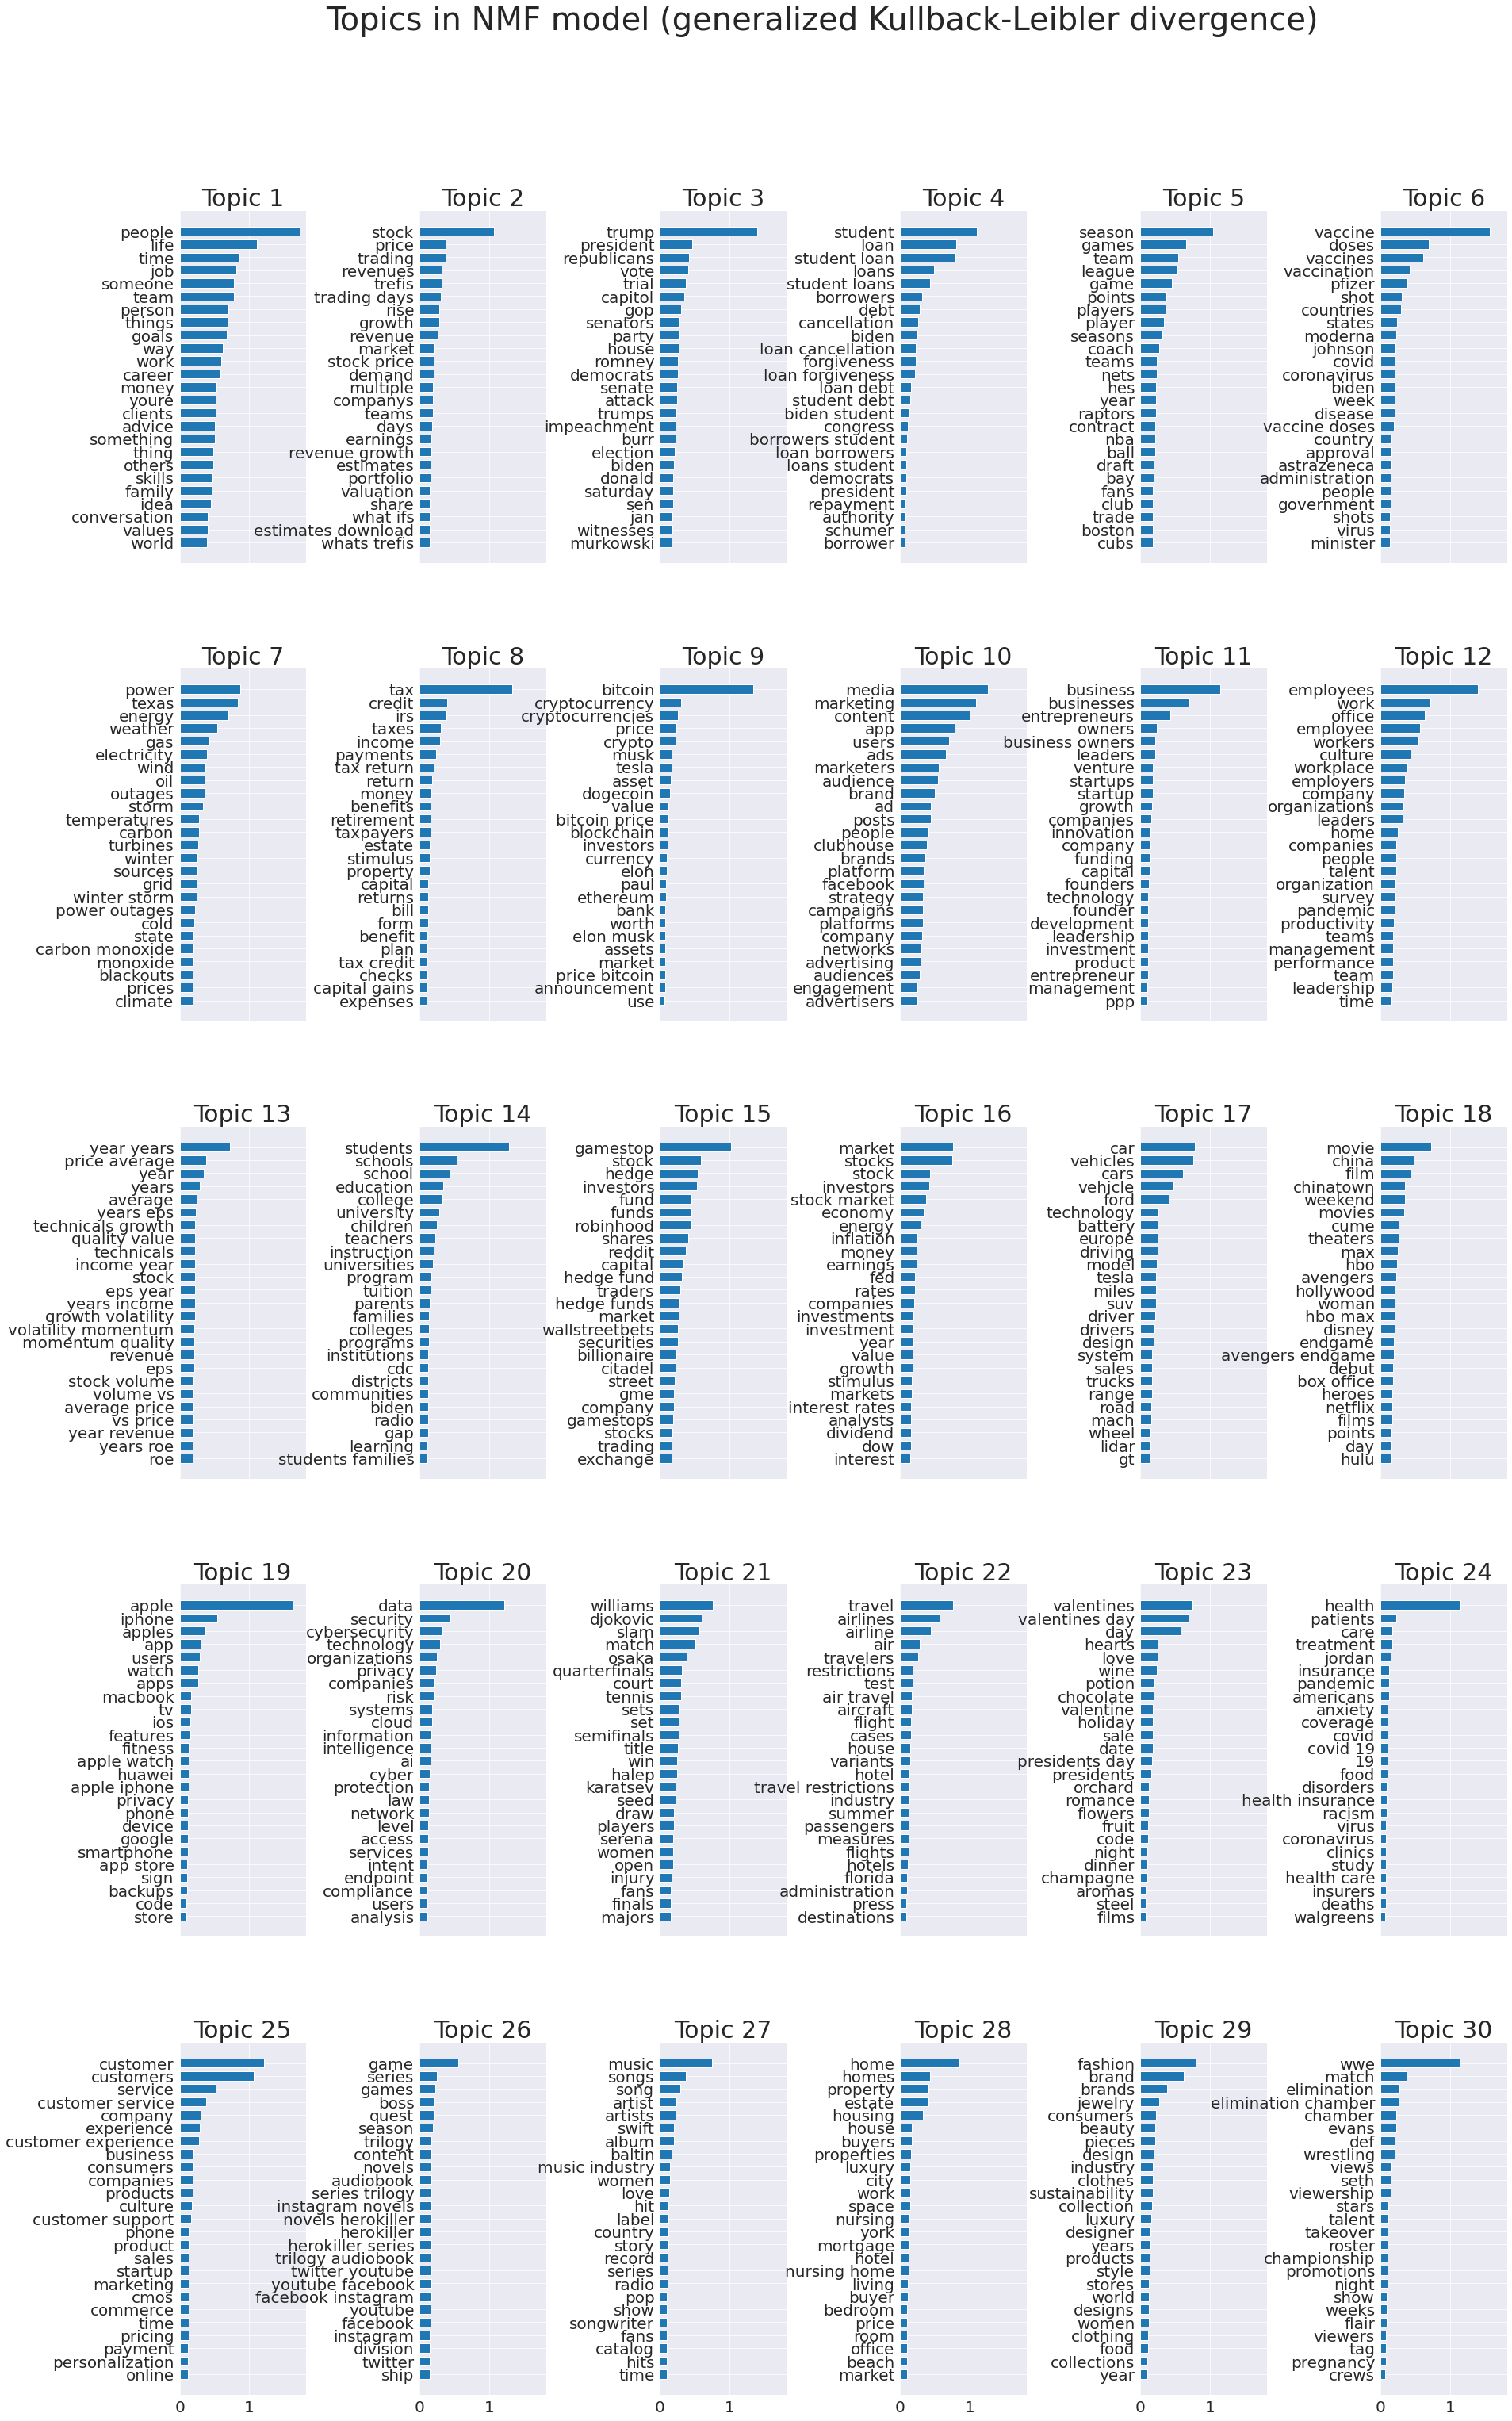

In [40]:
n_top_words = 25
plot_top_words(nmf2, tfidf_feature_names, n_top_words,
               'Topics in NMF model (generalized Kullback-Leibler divergence)')